# 箱ひげ図

四分位数に基づいてデータの分布を図にしたものが箱ひげ図です．
箱ひげ図は，複数の変量の分布を並べて比較するために利用されます．
一つの箱ひげ図は，幾つかの部品によって構成されます．

- 第1四分位数から第4四分位数までの長方形の箱
- 第4四分位数から上の $Q_{3/4}+1.5\text{IQR}$ 以下のデータを示す線のひげ
- 第1四分位数から下の $Q_{1/4}-1.5\text{IQR}$ 以上のデータを示す線のひげ
- 外れ値を示す小さい丸

![箱ひげ図](./images/box_plot.jpg)

この図で Outliers は外れ値です．
また，IQR は interquatile range の略で四分位範囲です．

この図は値を縦軸にしていますが，横軸にしても構いません．

*****
## Pythonによる箱ひげ図の描画

箱ひげ図は matplotlib.pyplot の <font color=green>boxplot()</font>によって描画します．
まずデータフレームの作成および作画のためのライブラリーを搬入します．

```Python
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

サンプルデータとして，那覇，横浜，札幌の三都市の2006年から2015年までの10年間の毎年の年間降水量（mm）を使用します．
このデータを箱ひげ図として描画することによって，三都市間の年間降水量の分布を比較します．

```Python
data = {
    'Naha'    :[2068,2817,1621,1865,2896,2122,2733,2071,2585,1425],
    'Yokohama':[1856,1465,1919,1894,1856,1557,1998,1517,1860,1836],
    'Sapporo' :[1146,1029, 843,1147,1325,1254,1279,1347,1204,1275]}

df = pd.DataFrame(data,index=range(2006,2016),columns=['Naha','Yokohama','Sapporo'])
df
```

In [2]:
data = {
    'Naha'    :[2068,2817,1621,1865,2896,2122,2733,2071,2585,1425],
    'Yokohama':[1856,1465,1919,1894,1856,1557,1998,1517,1860,1836],
    'Sapporo' :[1146,1029, 843,1147,1325,1254,1279,1347,1204,1275]}

df = pd.DataFrame(data,index=range(2006,2016),columns=['Naha','Yokohama','Sapporo'])
df

,Naha,Yokohama,Sapporo
2006,2068,1856,1146
2007,2817,1465,1029
2008,1621,1919,843
2009,1865,1894,1147
2010,2896,1856,1325
2011,2122,1557,1254
2012,2733,1998,1279
2013,2071,1517,1347
2014,2585,1860,1204
2015,1425,1836,1275


このデータフレームは3つの変量 Naha, Yokohama, Sapporo は浮動小数点数です．
全ての変量の基本統計を<font color=green>describe()</font>関数によって一括して求めます．

```Python
df.describe()
```

In [3]:
df.describe()

,Naha,Yokohama,Sapporo
count,10.000000,10.000000,10.000000
mean,2220.300000,1775.800000,1184.900000
std,514.407761,188.230237,153.538594
min,1425.000000,1465.000000,843.000000
25%,1915.750000,1626.750000,1146.250000
50%,2096.500000,1856.000000,1229.000000
75%,2696.000000,1885.500000,1278.000000
max,2896.000000,1998.000000,1347.000000


この出力には四分位数も含まれています．
この表を見ると，那覇の年間降水量が他の都市より多く，かつバラツキも大きいことが分かります．
この基本統計の結果をじっくり眺めれば三都市の年間降水量の分布について理解できますが，直感性がありません．
そこで，箱ひげ図を描画することによって，統計情報を視覚的に把握することができます．

### boxplot()関数

matplotlib.pyplotの<font color='green'>boxplot()</font>関数は，箱ひげ図を描画する関数です．

boxplotr()関数の呼出しは次のようになります．

> <font face='courier new'>matplotlib.pyplot.boxplot(x, **kwargs)</font>

**必須の引数**
- x：データ

**主要なキーワード指定の引数**

\*\*kwargsは，キーワードを指定して値を与える引数です．

|引数|説明|デフォルト値|
|:---:|:---:|:---:|
| label |各箱ひげ図のラベルの配列 | |
| vert  |True:縦表示, False:横表示|True|
| whis  |ひげの長さを決めるIRQに掛ける係数| 1.5 |

boxplot()関数の詳細については，マニュアルを参照してください．
[https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html)

各都市の気温を比較する箱ひげ図の描画は以下の通りとなります．

```Python
plt.boxplot(df.values,labels=df.columns)
plt.ylabel('Annual rainfall (mm)')
plt.show()
```

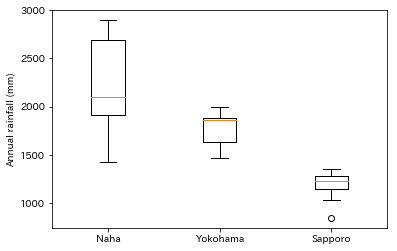

In [4]:
plt.boxplot(df.values,labels=df.columns)
plt.ylabel('Annual rainfall (mm)')
plt.show()

このように箱ひげ図は，似たような数値の分布を視覚的に比較する良い方法です．

*****